In [73]:
import pandas as pd
import csv 
import matplotlib.pyplot as plt
import seaborn as sns


In [74]:
data = pd.read_csv('../data/movies_data.csv', sep=',')

In [75]:
data.head(5)

,id,adult,backdrop_path,genre_ids,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,852445,False,/rzz7TBviOvDgIeujt2h9GwxV0AJ.jpg,"[18, 14]",fr,Acide,"During a heat wave, strange clouds start pouri...",51.062000,/91vF7SNB2tqsSultsmEn8tJYh4l.jpg,2023-09-20,Acid,False,5.725,149
1,136797,False,/lQppSn8sl6ivnxGNq8ADtC13NCE.jpg,"[28, 80, 18, 53]",en,Need for Speed,The film revolves around a local street-racer ...,59.846001,/z42kyMizgDKetejusZgucSQsQ4l.jpg,2014-03-12,Need for Speed,False,6.407,4199
2,769,False,/sw7mordbZxgITU877yTpZCud90M.jpg,"[18, 80]",en,GoodFellas,"The true story of Henry Hill, a half-Irish, ha...",130.830002,/aKuFiU82s5ISJpGZp7YkIr3kCUd.jpg,1990-09-12,GoodFellas,False,8.465,12326
3,299536,False,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,"[12, 28, 878]",en,Avengers: Infinity War,As the Avengers and their allies have continue...,236.960007,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,2018-04-25,Avengers: Infinity War,False,8.200,28780
4,9495,False,/malT2STjWopccqE4xacsnSm5Ln8.jpg,"[14, 28, 53]",en,The Crow,Exactly one year after young rock guitarist Er...,54.571999,/rMMB3v6jYHjsvXRNJYESacoTD7j.jpg,1994-05-11,The Crow,False,7.523,3752


In [76]:
print(data.info())

print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2208 non-null   int64  
 1   adult              2208 non-null   bool   
 2   backdrop_path      2185 non-null   object 
 3   genre_ids          2206 non-null   object 
 4   original_language  2208 non-null   object 
 5   original_title     2208 non-null   object 
 6   overview           2201 non-null   object 
 7   popularity         2208 non-null   float64
 8   poster_path        2208 non-null   object 
 9   release_date       2208 non-null   object 
 10  title              2208 non-null   object 
 11  video              2208 non-null   bool   
 12  vote_average       2208 non-null   float64
 13  vote_count         2208 non-null   int64  
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 211.4+ KB
None
(2208, 14)


Analyse univariée

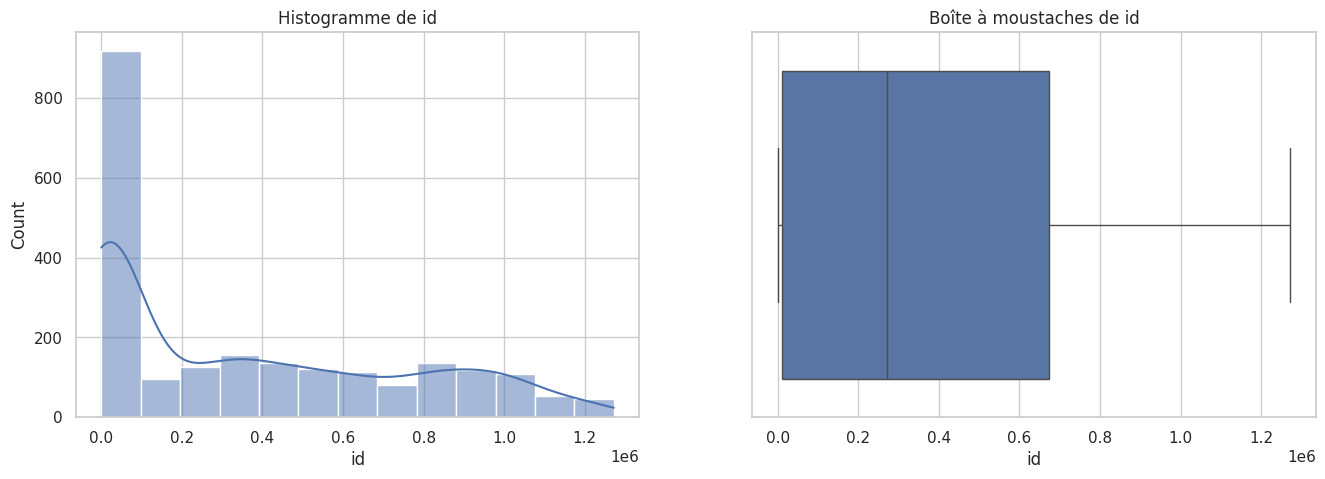

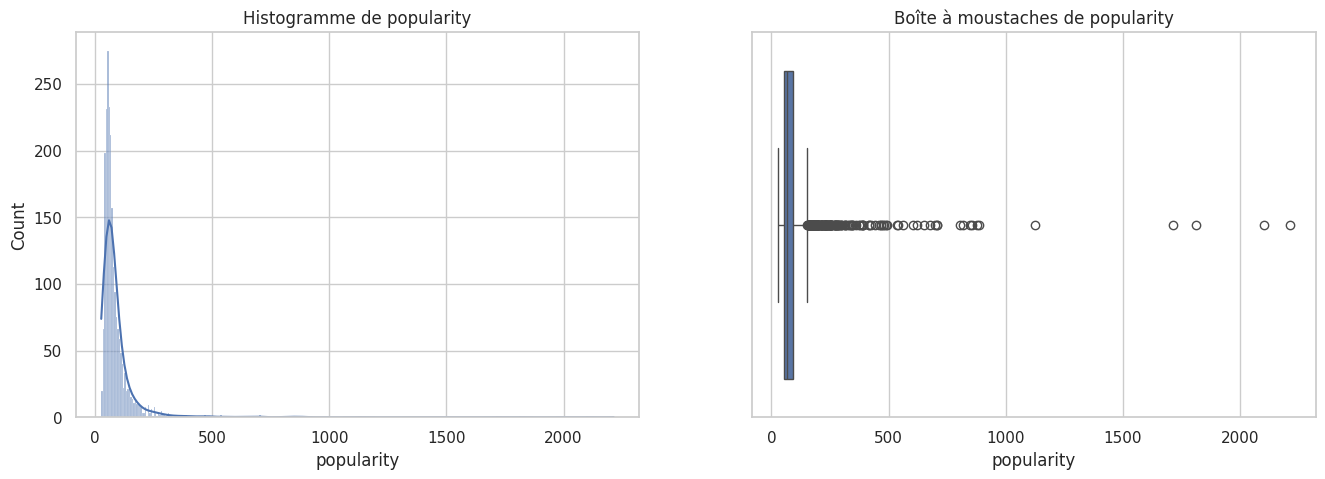

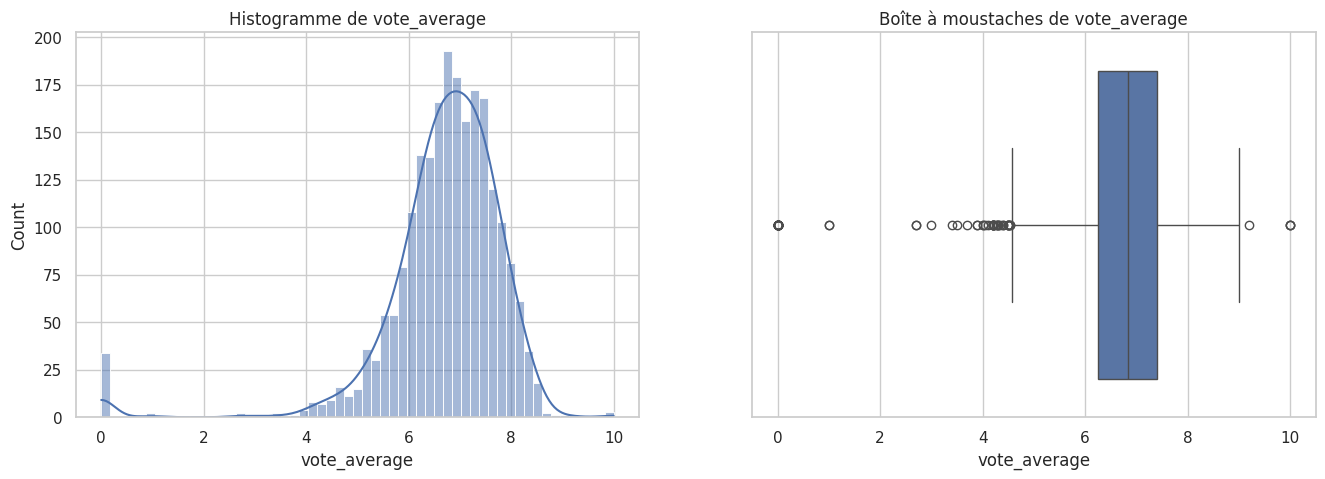

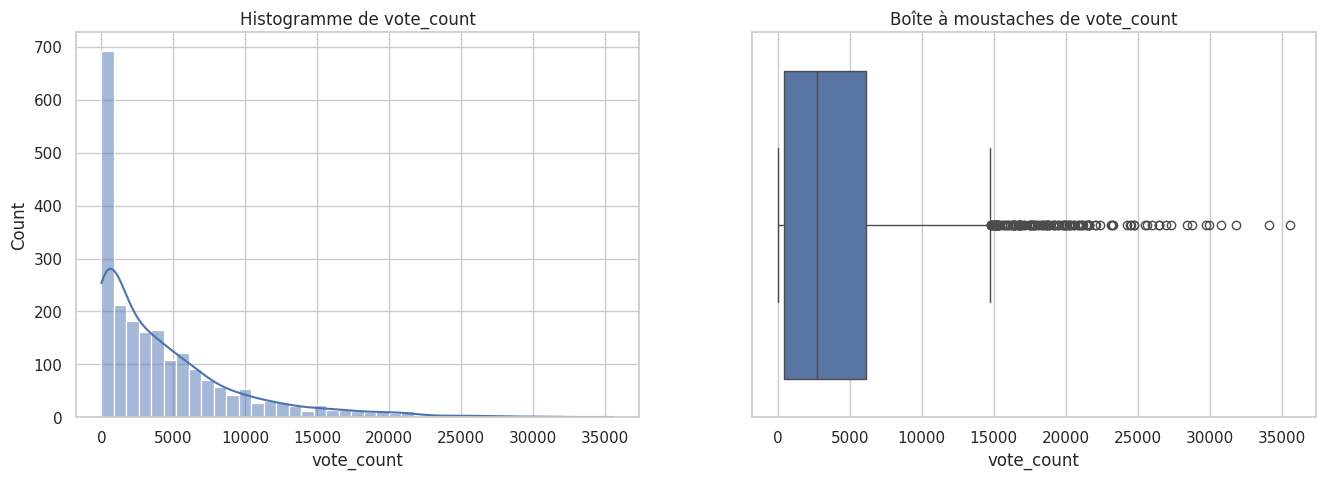

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

def plot_variable_distribution(data, column_name):
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    sns.histplot(data=data, x=column_name, kde=True, ax=ax[0])
    ax[0].set_title(f'Histogramme de {column_name}')
    sns.boxplot(x=data[column_name], ax=ax[1])
    ax[1].set_title(f'Boîte à moustaches de {column_name}')
    plt.show()
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    plot_variable_distribution(data, column)


Calcul du pourcentage de valeurs manquantes

In [78]:
def find_missing_percentage(df):
    missing_percentage = df.isnull().mean() * 100
    missing_percentage = missing_percentage[missing_percentage > 0]
    if missing_percentage.empty:
        print("Aucune valeur manquante trouvée dans le DataFrame.")
    else:
        print("Pourcentage de valeurs manquantes par variable :")
        print(missing_percentage)

# Utilisation de la fonction pour trouver les pourcentages de valeurs manquantes
find_missing_percentage(data)


Pourcentage de valeurs manquantes par variable :
backdrop_path    1.041667
genre_ids        0.090580
overview         0.317029
dtype: float64


Analyse multivariée

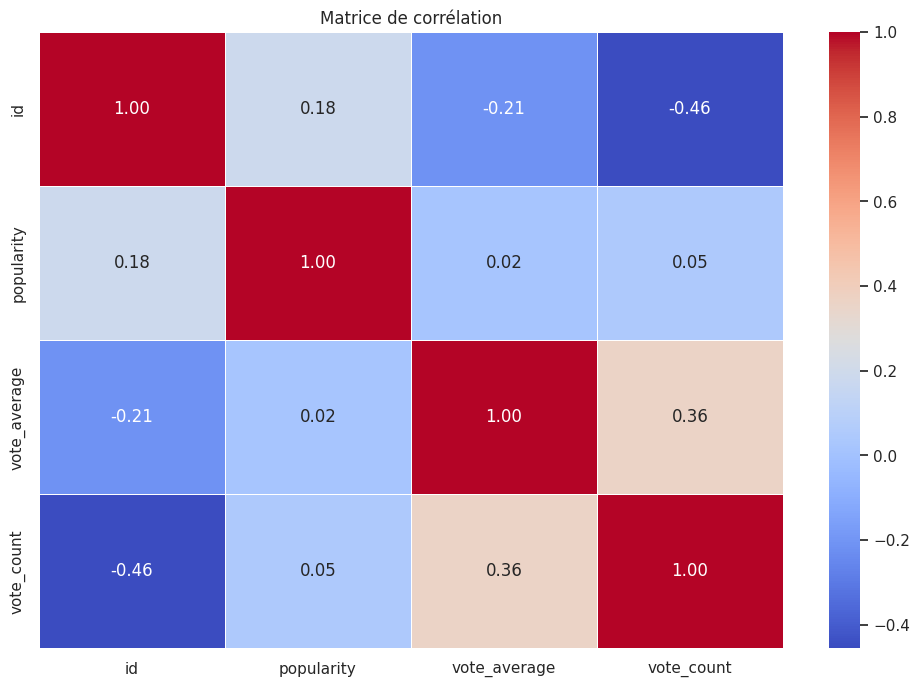

In [79]:
def plot_correlation_matrix(data):
    # Sélection des colonnes numériques
    numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

    corr_matrix = data[numeric_columns].corr()

    plt.figure(figsize=(12, 8))

    # Tracé de la matrice de corrélation avec heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matrice de corrélation')
    plt.show()

# Utilisation de la fonction pour afficher la matrice de corrélation
plot_correlation_matrix(data)

Encodage

In [96]:


def afficher_colonnes_par_type(data):
    """
    Affiche toutes les colonnes du DataFrame en fonction de leur type.
    Args:
        data (DataFrame): DataFrame contenant les données.
    """
    for dtype in data.dtypes.unique():
        print(f"Colonnes de type {dtype}:")
        print(list(data.select_dtypes(include=[dtype]).columns))
        print()
# Afficher les colonnes par type
afficher_colonnes_par_type(data)


Colonnes de type int64:
['id', 'vote_count']

Colonnes de type bool:
['adult', 'video']

Colonnes de type object:
['backdrop_path', 'genre_ids', 'original_language', 'original_title', 'overview', 'poster_path', 'release_date', 'title']

Colonnes de type float64:
['popularity', 'vote_average']



In [99]:
from sklearn.preprocessing import OneHotEncoder

def encode_categorical_variables(data, categorical_columns):
    # Select the categorical columns from the data
    categorical_data = data['backdrop_path', 'genre_ids', 'original_language', 'original_title', 'overview', 'poster_path', 'release_date', 'title']


    # Create an instance of the OneHotEncoder
    encoder = OneHotEncoder()

    # Fit and transform the categorical data using the encoder
    encoded_data = encoder.fit_transform(categorical_data)

    # Return the encoded data
    return encoded_data


In [104]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Columns: 13614 entries, id to title_xXx: State of the Union
dtypes: bool(13610), float64(2), int64(2)
memory usage: 28.7 MB
